In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Download stock data
def download_data(tickers, start_date):
    stock_data = yf.download(tickers,start=start_date)
    stock_data = stock_data.drop(columns=["Adj Close", "Volume"])
    stock_data["Close"] = stock_data['Close'].astype(float)
    stock_data = stock_data.dropna()
    return stock_data

In [8]:
# Download SPY (SP500) Prices
SP500_df = download_data(["SPY"], "1980-01-01")
SP500_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750
1993-02-01,43.96875,44.25000,43.96875,44.25000
1993-02-02,44.21875,44.37500,44.12500,44.34375
1993-02-03,44.40625,44.84375,44.37500,44.81250
1993-02-04,44.96875,45.09375,44.46875,45.00000


In [117]:
SP500_df.tail()

,Open,High,Low,Close,daily_return
Date,,,,,
2020-09-21,325.700012,327.130005,321.730011,326.970001,-0.011130
2020-09-22,328.570007,330.899994,325.859985,330.299988,0.010184
2020-09-23,330.899994,331.200012,322.100006,322.640015,-0.023191
2020-09-24,321.220001,326.799988,319.799988,323.500000,0.002665
2020-09-25,322.579987,329.579987,321.640015,328.730011,0.016167


In [121]:
# Calculate daily percent return
SP500_df['daily_return'] = SP500_df['Close'].pct_change()
SP500_df

,Open,High,Low,Close,daily_return
Date,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,0.007112
1993-02-02,44.218750,44.375000,44.125000,44.343750,0.002119
1993-02-03,44.406250,44.843750,44.375000,44.812500,0.010571
1993-02-04,44.968750,45.093750,44.468750,45.000000,0.004184
...,...,...,...,...,...
2020-09-21,325.700012,327.130005,321.730011,326.970001,-0.011130
2020-09-22,328.570007,330.899994,325.859985,330.299988,0.010184
2020-09-23,330.899994,331.200012,322.100006,322.640015,-0.023191


In [ ]:
!pip install --user bokeh==1.0.4 --upgrade

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.embed import components
from bokeh.io import output_notebook

print('Packages imported.')

Packages imported.


In [13]:
output_notebook()

Loading BokehJS ...

In [19]:
p = figure(plot_width=600, plot_height=275, title='Stock Value Historical Data', x_axis_type="datetime")

# Plot Lines
p.line(SP500_df.index, SP500_df.Open, line_width=2, line_color="#0099ff", legend='Open')
p.line(SP500_df.index, SP500_df.Close, line_width=2, line_color="#ff6699", legend='Close')
p.line(SP500_df.index, SP500_df.High, line_width=1, line_color="#000000", legend='High')
p.line(SP500_df.index, SP500_df.Low, line_width=1, line_color="#000000", legend='Low')

# Axis and Labels
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Date"
p.xaxis.axis_label_text_font_style = 'bold'
p.xaxis.axis_label_text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '14pt'
p.yaxis.axis_label = "Value ($ USD)"
p.yaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '16pt'
p.yaxis.major_label_text_font_size = '12pt'

In [20]:
show(p)

 In blue we have the opening value of the stock; in red the closing value of the stock; in black we have the maximum and minimum values (daily).

In [21]:
# Install required packages (this can take some minutes)
# UPDATE(vnderlev): setuptools-git is now required for fbprophet 0.5. 
!pip install --user pystan==2.17.1.0 holidays==0.9.8 setuptools-git==1.2 matplotlib==3.0.2 --upgrade

     |████████████████████████████████| 13.9 MB 11.0 MB/s eta 0:00:01   |███████████████████▋            | 8.5 MB 2.3 MB/s eta 0:00:03     |█████████████████████████▋      | 11.1 MB 2.3 MB/s eta 0:00:02
     |████████████████████████████████| 64 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 14.1 MB 14.0 MB/s eta 0:00:01     | 7.4 MB 14.0 MB/s eta 0:00:01     |███████████████████████████████▎| 13.8 MB 14.0 MB/s eta 0:00:01
  Created wheel for pystan: filename=pystan-2.17.1.0-cp37-cp37m-macosx_10_15_x86_64.whl size=25661073 sha256=3de99e591e4f08b336c104a517a362984c8c9f678df2a7c84e06e22588d70eac
  Stored in directory: /Users/jessicarosedecunhacarmichael/Library/Caches/pip/wheels/b5/a8/bc/2b6dc7bed3145b8fc2d70959a4fdbe53b8f23a11f0507024f4
  Created wheel for holidays: filename=holidays-0.9.8-py3-none-any.whl size=34735 sha256=a2049eb46aa666808e8762f36ecf251cda06c6d3a1b0d9932db945f850256f33
  Stored in directory: /Users/jessicarosedecunhacarmichael/Library/Caches/pip/whee

In [22]:
!pip install fbprophet==0.5

     |████████████████████████████████| 49 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 732 kB 5.7 MB/s eta 0:00:01     |█████████████▉                  | 317 kB 5.7 MB/s eta 0:00:01
  Created wheel for fbprophet: filename=fbprophet-0.5-py3-none-any.whl size=670495 sha256=07090feeacf9fca5154c73de2c30c169f4ab7dcd7ea1cc93256e15e557f2682f
  Stored in directory: /Users/jessicarosedecunhacarmichael/Library/Caches/pip/wheels/67/b1/ca/ad24f4ff43720362a231c594483f97498af99b40fe264cd056
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-py3-none-any.whl size=702876 sha256=9b9d08bcb0e7e94ab1f7b1916af10cda32246440d67e6596cf53e778610327f5
  Stored in directory: /Users/jessicarosedecunhacarmichael/Library/Caches/pip/wheels/80/32/5f/2a67880d4ce584b9cf99146f9945e46942dfb010a9382c6ff5
Successfully built fbprophet pymeeus


In [37]:
pip install --upgrade pystan

Searching for holidays
Best match: holidays 0.9.8
Adding holidays 0.9.8 to easy-install.pth file

Using /Users/jessicarosedecunhacarmichael/.local/lib/python3.7/site-packages
Processing dependencies for holidays
Finished processing dependencies for holidays


In [40]:
pip install holidays==0.9.9

     |████████████████████████████████| 68 kB 981 kB/s eta 0:00:011
  Created wheel for holidays: filename=holidays-0.9.9-py3-none-any.whl size=37650 sha256=7a5a09924fc8f46fe77a314837c5ea6c549e1a4cfbc93b23b93a48d31183ed4f
  Stored in directory: /Users/jessicarosedecunhacarmichael/Library/Caches/pip/wheels/87/8a/8f/fb1b714f91036e89cd8aea1bb8b505a92a445e651d7a53e835
Successfully built holidays
  Attempting uninstall: holidays
    Found existing installation: holidays 0.9.8
    Uninstalling holidays-0.9.8:
      Successfully uninstalled holidays-0.9.8
Note: you may need to restart the kernel to use updated packages.


In [41]:
import fbprophet
import datetime as dt

print('Packages imported.')

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


Packages imported.



In the training process of our predictive model, we will use the fbprophet package, developed by Facebook for time series analysis.

Fbprophet follows the same style of objects as sklearn, an extremely popular machine learning python library. An instance of the Prophet class is created and then the fit andpredict methods are used.

The training set of a Prophet model is a two-column pandas dataframe with the columns ds andy. The ds (datestamp) column must be a date in the format YYYY-MM-DD, or a timestamp in the format YYYY-MM-DD HH:MM:SS. The y column must be numeric, and represents the variable we wish to model in the future.



In [131]:
df_train = SP500_df.copy()
#df_train = df_train[(df_train.index > dt.datetime(2008,1,1))]
df_train.tail()
df_train.reset_index()
df_train.tail()


,Open,High,Low,Close,daily_return
Date,,,,,
2020-09-21,325.700012,327.130005,321.730011,326.970001,-0.011130
2020-09-22,328.570007,330.899994,325.859985,330.299988,0.010184
2020-09-23,330.899994,331.200012,322.100006,322.640015,-0.023191
2020-09-24,321.220001,326.799988,319.799988,323.500000,0.002665
2020-09-25,322.579987,329.579987,321.640015,328.730011,0.016167


In [136]:
df_train.rename(columns={'Open':'y','Date':'ds'}, inplace=True)
df_train = df_train.filter(items=['ds', 'y'])
df_train.tail()
#df_train.index.names = ['ds']
#df_train.reset_index(inplace = True)

,ds,y
6961,2020-09-21,325.700012
6962,2020-09-22,328.570007
6963,2020-09-23,330.899994
6964,2020-09-24,321.220001
6965,2020-09-25,322.579987


In [137]:
# Instantiate a fbprophet model
model = fbprophet.Prophet(daily_seasonality=False,
                weekly_seasonality=False, 
                yearly_seasonality=True,
                changepoint_prior_scale=0.05,
                changepoints=None)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [138]:
# Train model
model.fit(df_train)

In [139]:
# Execute forecasting algorithm (1 year into the future)
future_data = model.make_future_dataframe(periods=365, freq='D')
future_data = model.predict(future_data)
future_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7326,2021-09-21,341.186191,326.065850,355.431408,331.724318,348.190361,0.035302,0.035302,0.035302,0.284365,0.284365,0.284365,-0.249063,-0.249063,-0.249063,0.0,0.0,0.0,341.221494
7327,2021-09-22,341.248318,328.463257,354.625358,331.678344,348.315012,-0.123284,-0.123284,-0.123284,0.260031,0.260031,0.260031,-0.383314,-0.383314,-0.383314,0.0,0.0,0.0,341.125035
7328,2021-09-23,341.310446,327.180468,354.644712,331.632369,348.462327,-0.425603,-0.425603,-0.425603,0.096500,0.096500,0.096500,-0.522104,-0.522104,-0.522104,0.0,0.0,0.0,340.884842
7329,2021-09-24,341.372573,327.210709,355.226693,331.586395,348.574342,-0.722755,-0.722755,-0.722755,-0.058131,-0.058131,-0.058131,-0.664624,-0.664624,-0.664624,0.0,0.0,0.0,340.649818
7330,2021-09-25,341.434700,326.319637,354.283654,331.593021,348.696939,-0.888451,-0.888451,-0.888451,-0.078486,-0.078486,-0.078486,-0.809965,-0.809965,-0.809965,0.0,0.0,0.0,340.546249


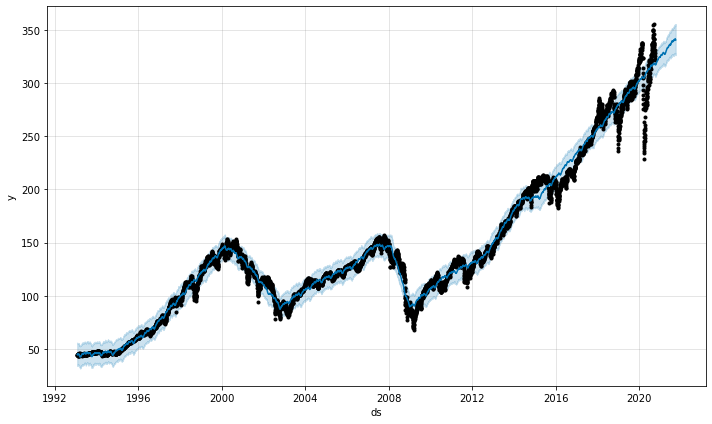

In [140]:
fig1 = model.plot(future_data)

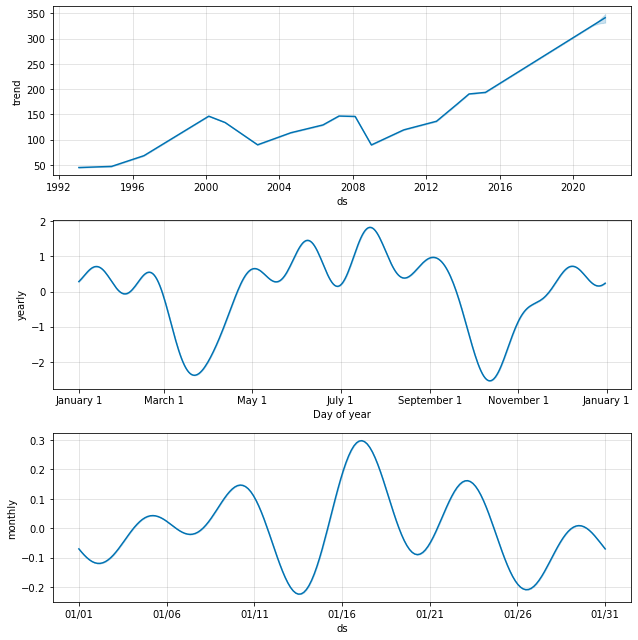

In [141]:
fig2 = model.plot_components(future_data)

In [150]:
SP500_df.head()
#P500_df.reset_index(inplace = True)
SP500_df.head()

,index,Date,Open,High,Low,Close,daily_return
0,0,1993-01-29,43.96875,43.96875,43.75000,43.93750,NaN
1,1,1993-02-01,43.96875,44.25000,43.96875,44.25000,0.007112
2,2,1993-02-02,44.21875,44.37500,44.12500,44.34375,0.002119
3,3,1993-02-03,44.40625,44.84375,44.37500,44.81250,0.010571
4,4,1993-02-04,44.96875,45.09375,44.46875,45.00000,0.004184


In [151]:
p = figure(plot_width=1200, plot_height=550, title='Stock Value Historical Data', x_axis_type="datetime")

# Plot Lines
p.line(SP500_df[SP500_df['Date'] > dt.datetime(2008,1,1)].Date, SP500_df[SP500_df['Date'] > dt.datetime(2008,1,1)].Open, line_width=2, line_color="#0099ff", legend='Observed Open Value')
p.line(future_data.ds, future_data.yhat, line_width=2, line_color="#2B0000", legend='Modeled Open Value')
p.line(future_data.ds, future_data.yhat_upper, line_width=0.5, line_color="#000099", legend='Upper Estimates')
p.line(future_data.ds, future_data.yhat_lower, line_width=0.5, line_color="#000099", legend='Lower Estimates')

# Axis and Labels
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Date"
p.xaxis.axis_label_text_font_style = 'bold'
p.xaxis.axis_label_text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '14pt'
p.yaxis.axis_label = "Value ($ USD)"
p.yaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '16pt'
p.yaxis.major_label_text_font_size = '12pt'

In [152]:
show(p)

In [153]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 51 forecasts with cutoffs between 1995-02-04 00:00:00 and 2019-09-26 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1995-02-06,46.894867,46.487120,47.340242,48.015625,1995-02-04
1,1995-02-07,46.869299,46.429595,47.284548,48.312500,1995-02-04
2,1995-02-08,46.800174,46.380176,47.217718,48.234375,1995-02-04
3,1995-02-09,46.701658,46.292239,47.146214,48.218750,1995-02-04
4,1995-02-10,46.619275,46.193357,47.046505,48.234375,1995-02-04


In [154]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,165.451951,12.862813,9.211224,0.072285,0.331513
1,38 days,166.865187,12.917631,9.241898,0.072639,0.331825
2,39 days,167.354591,12.936560,9.268314,0.072904,0.331981
3,40 days,167.116185,12.927343,9.296024,0.073060,0.329998
4,41 days,168.509222,12.981110,9.341532,0.073455,0.326722


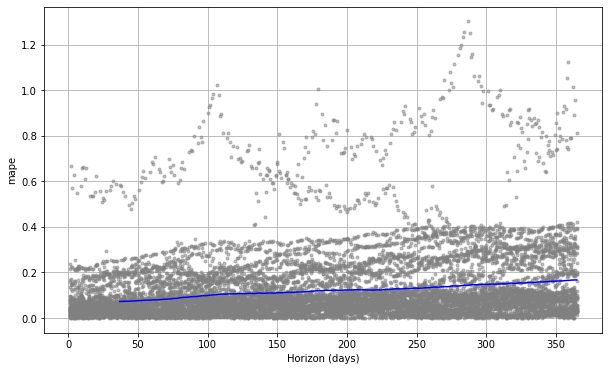

In [155]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots. We see for this forecast that errors around 5% are typical for predictions one month into the future, and that errors increase up to around 11% for predictions that are a year out.